# EDA, Visualizing and Predicting BASEL Temperature.(Regression)

In [199]:
# importing data analysis libraries

import pandas as pd
import numpy as np

In [200]:
# importing data visualization librarie

import matplotlib.pyplot as plt
import seaborn as sns

## load dataset


In [201]:
df = pd.read_csv('weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


## Choose 1st 10 columns only (Basel City)

In [202]:
df = df.iloc[:,0:11]

# sample of data
df.sample(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
2265,20060315,3,3,0.67,1.0195,1.72,0.00,8.8,1.1,-4.0,5.5
627,20010919,9,8,0.76,1.0135,0.60,0.28,0.4,10.9,5.7,15.4
405,20010209,2,6,0.65,1.0177,0.69,0.00,1.8,6.6,2.6,9.4
3285,20081229,12,0,0.78,1.0308,0.59,0.00,6.0,-2.9,-6.7,1.0
914,20020703,7,6,0.68,1.0089,1.78,0.60,5.1,17.8,12.8,24.0
1490,20040130,1,5,0.68,1.0207,0.91,0.00,7.7,-1.4,-4.2,1.9
889,20020608,6,7,0.75,1.0092,2.13,0.49,2.9,15.5,12.0,20.9
2566,20070110,1,4,0.77,1.0227,0.60,0.23,5.3,10.2,6.7,14.1
2023,20050716,7,6,0.68,1.0154,1.93,0.02,6.4,22.9,17.9,28.3
203,20000722,7,3,0.63,1.0167,3.06,0.00,12.2,19.2,11.9,26.0


In [203]:
# info about data columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    3654 non-null   int64  
 1   MONTH                   3654 non-null   int64  
 2   BASEL_cloud_cover       3654 non-null   int64  
 3   BASEL_humidity          3654 non-null   float64
 4   BASEL_pressure          3654 non-null   float64
 5   BASEL_global_radiation  3654 non-null   float64
 6   BASEL_precipitation     3654 non-null   float64
 7   BASEL_sunshine          3654 non-null   float64
 8   BASEL_temp_mean         3654 non-null   float64
 9   BASEL_temp_min          3654 non-null   float64
 10  BASEL_temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


In [204]:
# check for null values

df.isnull().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
BASEL_global_radiation    0
BASEL_precipitation       0
BASEL_sunshine            0
BASEL_temp_mean           0
BASEL_temp_min            0
BASEL_temp_max            0
dtype: int64

In [205]:
# knowing no. of unique values in each column

df.nunique()

DATE                      3654
MONTH                       12
BASEL_cloud_cover            9
BASEL_humidity              60
BASEL_pressure             436
BASEL_global_radiation     346
BASEL_precipitation        239
BASEL_sunshine             153
BASEL_temp_mean            341
BASEL_temp_min             309
BASEL_temp_max             393
dtype: int64

In [206]:
# describing numerical columns in a statistical way

df.drop(columns=['DATE','MONTH']).describe()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782
std,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323
min,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000
25%,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000
50%,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000
75%,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000
max,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000


In [207]:
# convert 'data' column to datetime formate

df['DATE'] = pd.to_datetime(df['DATE'],format='%Y%m%d')
df['DATE']

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
3649   2009-12-28
3650   2009-12-29
3651   2009-12-30
3652   2009-12-31
3653   2010-01-01
Name: DATE, Length: 3654, dtype: datetime64[ns]

## The data does NOT need to be cleaned, so we can seek into visualization

Text(0, 0.5, 'Temp')

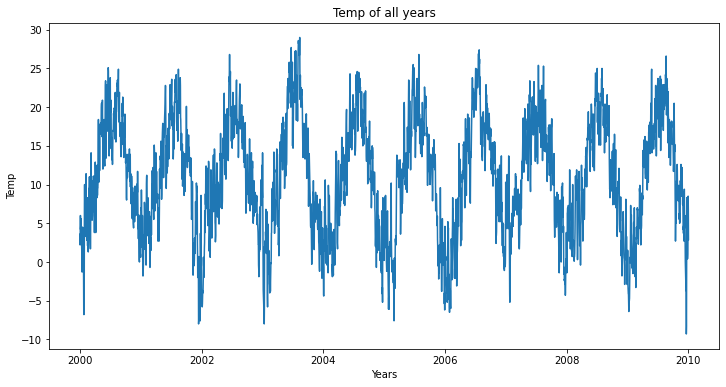

In [208]:
# ploting temperature of all years

plt.figure(figsize=(12,6))
plt.plot(df['DATE'],df['BASEL_temp_mean'])
plt.title('Temp of all years')
plt.xlabel('Years')
plt.ylabel('Temp')

In [209]:
# Calculates the mean value of a specified feature(most probably 'BASEL_temp_mean') for each MONTH.
# it returns a list of 12 values.

def mean_for_mth(feature):
    mean = []
    for x in range(12):
        mean.append(
            float('{:.2f}'.format(df[df['MONTH'] == (x+1)][feature].mean())))
    return mean

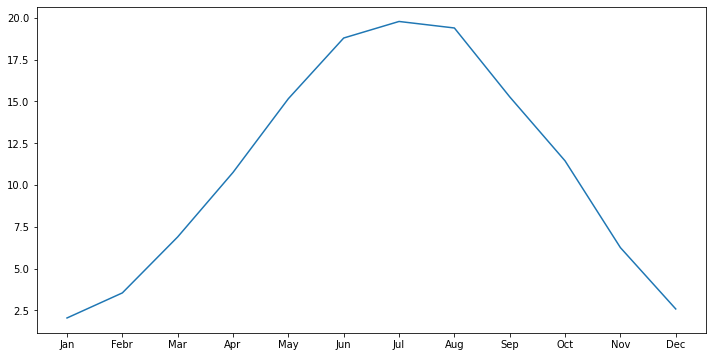

In [210]:
# ploting the mean temperature all over MONTHs

MONTH = ['Jan', 'Febr', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12,6))
plt.plot(MONTH,mean_for_mth('BASEL_temp_mean'))

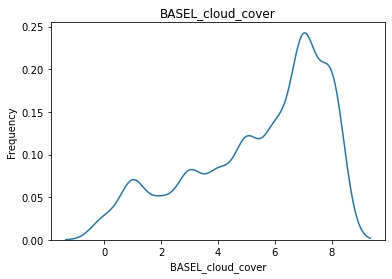

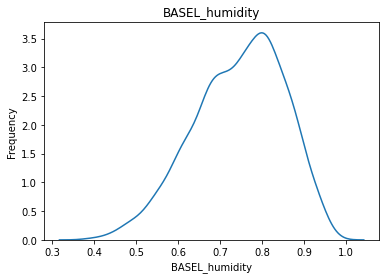

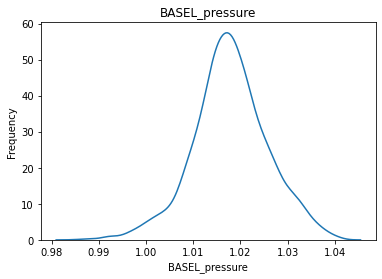

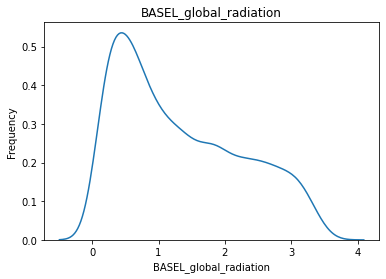

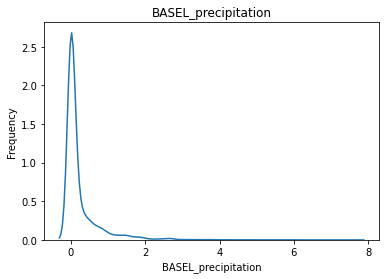

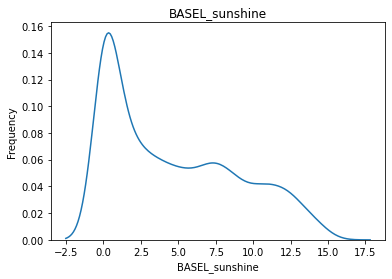

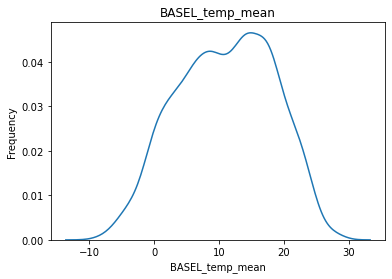

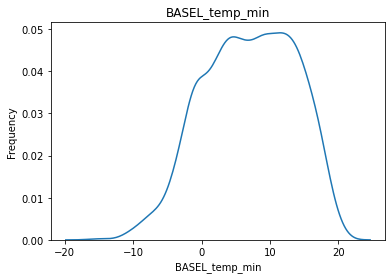

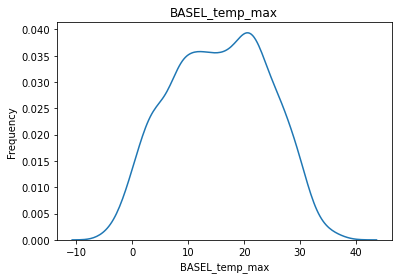

In [211]:
# plot the frequency of values in each column (how the Distribution is)

for column in df.drop(columns=['DATE','MONTH']):
    plt.figure()
    sns.kdeplot(df[column]) 
    plt.title(column)  
    plt.xlabel(column)  
    plt.ylabel('Frequency')
    plt.show()

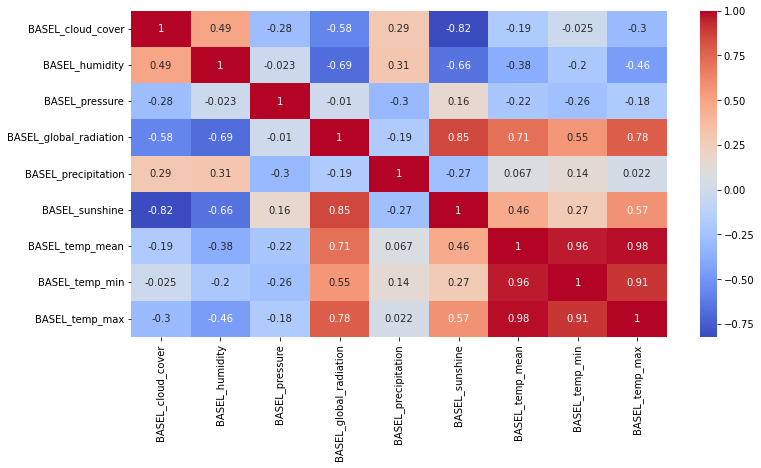

In [212]:
# the corr between columns

plt.figure(figsize=(12,6))
sns.heatmap(df.drop(columns=['MONTH','DATE']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [213]:
# remove useless columns after we did what we needed (i am not selfish but it is what it is)

df = df.drop(columns=['DATE','BASEL_temp_min','BASEL_temp_max','BASEL_precipitation'])
df

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,BASEL_temp_mean
0,1,8,0.89,1.0286,0.20,0.0,2.9
1,1,8,0.87,1.0318,0.25,0.0,3.6
2,1,5,0.81,1.0314,0.50,3.7,2.2
3,1,7,0.79,1.0262,0.63,6.9,3.9
4,1,5,0.90,1.0246,0.51,3.7,6.0
...,...,...,...,...,...,...,...
3649,12,7,0.82,1.0084,0.28,0.3,3.2
3650,12,7,0.92,1.0028,0.22,0.2,4.5
3651,12,8,0.92,0.9979,0.07,0.0,8.5
3652,12,7,0.93,0.9958,0.17,0.1,6.6


## Encoding 'MONTH' column

In [214]:
# make 'MONTH' column encoded so we will use it

encoded_df = pd.get_dummies(df, columns=['MONTH'], prefix='MONTH')
encoded_df = encoded_df.drop(columns=['BASEL_temp_mean'])
encoded_df

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,8,0.89,1.0286,0.20,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,8,0.87,1.0318,0.25,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,5,0.81,1.0314,0.50,3.7,1,0,0,0,0,0,0,0,0,0,0,0
3,7,0.79,1.0262,0.63,6.9,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0.90,1.0246,0.51,3.7,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,7,0.82,1.0084,0.28,0.3,0,0,0,0,0,0,0,0,0,0,0,1
3650,7,0.92,1.0028,0.22,0.2,0,0,0,0,0,0,0,0,0,0,0,1
3651,8,0.92,0.9979,0.07,0.0,0,0,0,0,0,0,0,0,0,0,0,1
3652,7,0.93,0.9958,0.17,0.1,0,0,0,0,0,0,0,0,0,0,0,1


## Scaling features 

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)

scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)

In [216]:
scaled_df

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,1.110260,1.344433,1.347006,-1.208678,-1.076608,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
1,1.110260,1.158857,1.748954,-1.155215,-1.076608,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
2,-0.179963,0.602130,1.698710,-0.887898,-0.222009,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
3,0.680186,0.416555,1.045546,-0.748894,0.517103,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
4,-0.179963,1.437221,0.844572,-0.877206,-0.222009,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.680186,0.694918,-1.190288,-1.123137,-1.007316,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3650,0.680186,1.622796,-1.893696,-1.187293,-1.030413,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3651,1.110260,1.622796,-2.509178,-1.347683,-1.076608,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3652,0.680186,1.715584,-2.772956,-1.240756,-1.053510,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372


# ML 

In [217]:
# Features

X = scaled_df
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,1.110260,1.344433,1.347006,-1.208678,-1.076608,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
1,1.110260,1.158857,1.748954,-1.155215,-1.076608,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
2,-0.179963,0.602130,1.698710,-0.887898,-0.222009,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
3,0.680186,0.416555,1.045546,-0.748894,0.517103,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
4,-0.179963,1.437221,0.844572,-0.877206,-0.222009,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.680186,0.694918,-1.190288,-1.123137,-1.007316,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3650,0.680186,1.622796,-1.893696,-1.187293,-1.030413,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3651,1.110260,1.622796,-2.509178,-1.347683,-1.076608,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3652,0.680186,1.715584,-2.772956,-1.240756,-1.053510,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372


In [218]:
# Target

y = df["BASEL_temp_mean"]
y

0       2.9
1       3.6
2       2.2
3       3.9
4       6.0
       ... 
3649    3.2
3650    4.5
3651    8.5
3652    6.6
3653    2.9
Name: BASEL_temp_mean, Length: 3654, dtype: float64

In [219]:
# split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM regression model (SVR)

In [220]:
# train and test SVM model

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=100)
svr.fit(X_train, y_train)
svr_train = svr.score(X_train, y_train)
svr_test = svr.score(X_test, y_test)
svr_y_train_pred = svr.predict(X_train)
svr_y_pred = svr.predict(X_test)

In [221]:
print('training score : ',svr_train)
print('testing score : ',svr_test)

training score :  0.7872654728393614
testing score :  0.7899106656922888


## Evaluate SVM model

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

svr_rmse_train = mean_squared_error(y_train, svr_y_train_pred, squared=False)
svr_rmse_test = mean_squared_error(y_test, svr_y_pred, squared=False)
svr_cross_val_score = cross_val_score(svr, X, y, cv=5).mean()
svr_r2 = r2_score(y_test, svr_y_pred)

In [223]:
print('rmse train score : ',svr_rmse_train )
print('rmse test score : ',svr_rmse_test )
print('cross_val_score : ',svr_cross_val_score )
print('r2 score : ',svr_r2 )

rmse train score :  3.4271611100988904
rmse test score :  3.3668053982519495
cross_val_score :  0.7760498345978132
r2 score :  0.7899106656922888


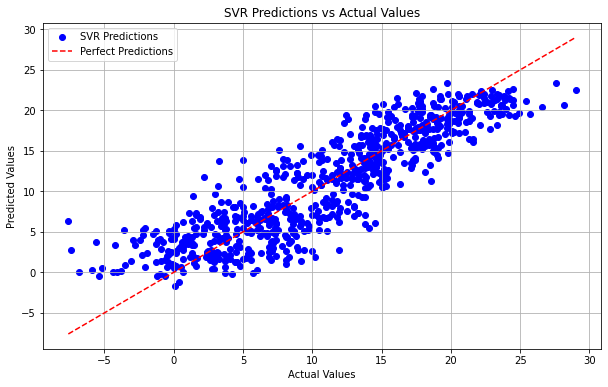

In [224]:
# visualize the difference between Predictions and Actual values

y_pred = svr.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, color='blue', label='SVR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Predictions')
plt.title('SVR Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
X_test

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
1313,-1.040112,-2.088716,0.216529,1.197172,0.909756,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,3.284372,-0.299074,-0.304472,-0.299074,-0.304472
1674,-1.900260,-1.717565,-0.223101,1.646264,1.879841,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,3.284372,-0.299074,-0.304472,-0.299074,-0.304472
229,-1.040112,-0.047384,-0.336149,0.544919,0.494006,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,3.284372,-0.299074,-0.304472,-0.299074,-0.304472
3509,0.680186,1.066069,-0.135175,-0.150104,-0.753246,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,3.284372,-0.299074,-0.304472,-0.299074,-0.304472
2222,-1.900260,0.973282,1.007863,-0.502962,0.286130,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.610037,0.787706,0.090920,-0.941362,-0.429884,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
1752,0.680186,0.045404,-0.599927,-0.791664,-0.868732,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,3.284372,-0.299074,-0.304472
1598,-1.900260,-1.810353,0.643598,2.041893,2.133910,-0.305009,-0.289744,-0.304472,-0.299074,3.284372,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
678,0.680186,0.602130,-0.436636,-0.738201,-0.476079,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,3.343651,-0.304472


## Predict function for SVR model

In [226]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def predict_svr_from_user_input(svr, encoded_df):
    # Get input from the user for each feature
    BASEL_cloud_cover = float(input("Enter the value for BASEL_cloud_cover: "))
    BASEL_humidity = float(input("Enter the value for BASEL_humidity: "))
    BASEL_pressure = float(input("Enter the value for BASEL_pressure: "))
    BASEL_global_radiation = float(input("Enter the value for BASEL_global_radiation: "))
    BASEL_sunshine = float(input("Enter the value for BASEL_sunshine: "))
    MONTH = input("Enter the MONTH (e.g., 1, 2, 3..): ")

    # Create the input_data DataFrame
    input_data = pd.DataFrame({
        'BASEL_cloud_cover': [BASEL_cloud_cover],
        'BASEL_humidity': [BASEL_humidity],
        'BASEL_pressure': [BASEL_pressure],
        'BASEL_global_radiation': [BASEL_global_radiation],
        'BASEL_sunshine': [BASEL_sunshine]
    }, index=[0])

    # Add dummy columns for each MONTH
    MONTHs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for m in MONTHs:
        if m == MONTH:
            input_data['MONTH_' + m] = 1
        else:
            input_data['MONTH_' + m] = 0

    combined_df = pd.concat([encoded_df, input_data], axis=0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_df)
    combined_df = pd.DataFrame(scaled_data, columns=combined_df.columns)
    input_data = combined_df.tail(1)
    
    predicted_svr = svr.predict(input_data)
    return predicted_svr

# Example usage:
# Assuming you have svr and encoded_df already defined
predicted_value = predict_svr_from_user_input(svr, encoded_df)
print("Predicted mean temperature for SVR model is:", predicted_value[0])


Enter the value for BASEL_cloud_cover: 5
Enter the value for BASEL_humidity: 0.86
Enter the value for BASEL_pressure: 1.0137
Enter the value for BASEL_global_radiation: 1.29
Enter the value for BASEL_sunshine: 1.5
Enter the MONTH (e.g., 1, 2, 3..): 8
Predicted mean temperature for SVR model is: 16.491319219375868


# Decision Tree Regressor model

In [227]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_split=40, max_depth=15)

tree_reg.fit(X_train, y_train)

tree_reg_train = tree_reg.score(X_train, y_train)
tree_reg_test = tree_reg.score(X_test, y_test)
tree_reg_y_pred = tree_reg.predict(X_test)

In [228]:
print('training score : ', tree_reg_train)
print('testing score : ', tree_reg_test)

training score :  0.8450799586730526
testing score :  0.7852553069747574


## Evaluate DT model

In [229]:
from sklearn.metrics import mean_squared_error, r2_score

tree_mse = mean_squared_error(y_test, tree_reg_y_pred)
tree_r2 = r2_score(y_test, tree_reg_y_pred)

print('Mean Squared Error : ', tree_mse)
print('r2 score : ', tree_r2)

Mean Squared Error :  11.586558658919792
r2 score :  0.7852553069747574


## This is our tree

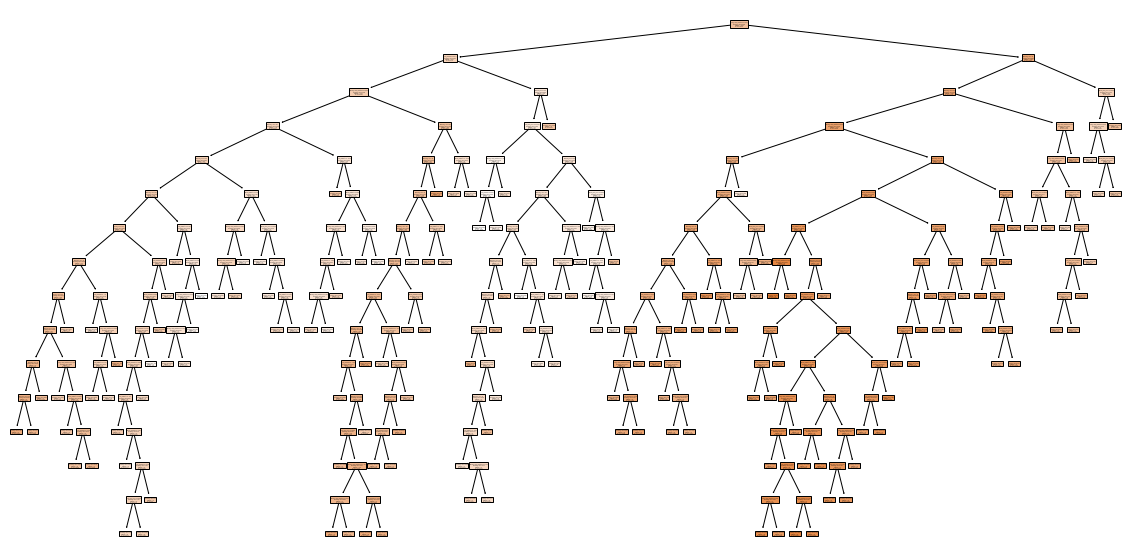

In [230]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10)) 
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.show()

## Predict function for Decision Tree model (Regressor)

In [231]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def predict_tree_reg_from_user_input(tree_reg, encoded_df):
    # Get input from the user for each feature
    BASEL_cloud_cover = float(input("Enter the value for BASEL_cloud_cover: "))
    BASEL_humidity = float(input("Enter the value for BASEL_humidity: "))
    BASEL_pressure = float(input("Enter the value for BASEL_pressure: "))
    BASEL_global_radiation = float(input("Enter the value for BASEL_global_radiation: "))
    BASEL_sunshine = float(input("Enter the value for BASEL_sunshine: "))
    MONTH = input("Enter the MONTH (e.g., 1, 2, 3..): ")

    # Create the input_data DataFrame
    input_data = pd.DataFrame({
        'BASEL_cloud_cover': [BASEL_cloud_cover],
        'BASEL_humidity': [BASEL_humidity],
        'BASEL_pressure': [BASEL_pressure],
        'BASEL_global_radiation': [BASEL_global_radiation],
        'BASEL_sunshine': [BASEL_sunshine]
    }, index=[0])

    # Add dummy columns for each MONTH
    MONTHs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for m in MONTHs:
        if m == MONTH:
            input_data['MONTH_' + m] = 1
        else:
            input_data['MONTH_' + m] = 0

    combined_df = pd.concat([encoded_df, input_data], axis=0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_df)
    combined_df = pd.DataFrame(scaled_data, columns=combined_df.columns)
    input_data = combined_df.tail(1)
    
    predicted_tree_reg = tree_reg.predict(input_data)
    return predicted_tree_reg

# Example usage:
# Assuming you have tree_reg and encoded_df already defined
predicted_value = predict_tree_reg_from_user_input(tree_reg, encoded_df)
print("Predicted mean temperature for Decision Tree model is:", predicted_value[0])


Enter the value for BASEL_cloud_cover: 5
Enter the value for BASEL_humidity: 0.86
Enter the value for BASEL_pressure: 1.0137
Enter the value for BASEL_global_radiation: 1.29
Enter the value for BASEL_sunshine: 1.5
Enter the MONTH (e.g., 1, 2, 3..): 8
Predicted mean temperature for Decision Tree model is: 17.392307692307693


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA, Visualizing and Predicting BASEL day whether we can BBQ or not.(Classification)

In [232]:
df = pd.read_csv('weather_prediction_dataset.csv')
df = df.iloc[:,0:11]

# sample of data
df.sample(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
105,20000415,4,7,0.67,1.0029,0.83,0.10,1.0,10.0,6.1,14.2
3416,20090509,5,7,0.80,1.0176,2.21,0.80,5.0,16.8,11.8,23.7
3454,20090616,6,6,0.66,1.0227,3.06,0.01,10.2,18.4,13.1,22.5
1545,20040325,3,8,0.87,1.0163,0.47,0.11,0.0,2.5,1.1,4.6
249,20000906,9,7,0.78,1.0184,1.20,0.52,1.9,14.4,10.5,18.3
301,20001028,10,4,0.79,1.0191,1.11,0.00,8.6,10.5,5.7,16.3
923,20020712,7,2,0.64,1.0183,3.17,0.83,12.6,19.6,12.1,26.6
1868,20050211,2,8,0.81,1.0274,0.12,0.38,0.0,6.6,5.3,7.9
3379,20090402,4,7,0.71,1.0140,1.35,0.00,3.0,11.6,6.2,17.0
2902,20071212,12,8,0.90,1.0334,0.10,0.01,0.0,3.8,3.2,5.1


In [233]:
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')
df_bbq

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3650,20091229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3651,20091230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3652,20091231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [234]:
df_bbq = df_bbq['BASEL_BBQ_weather']
df_bbq

0       False
1       False
2       False
3       False
4       False
        ...  
3649    False
3650    False
3651    False
3652    False
3653    False
Name: BASEL_BBQ_weather, Length: 3654, dtype: bool

In [235]:
df_bbq.isnull().sum()

0

In [236]:
df_bbq.value_counts()

False    2717
True      937
Name: BASEL_BBQ_weather, dtype: int64

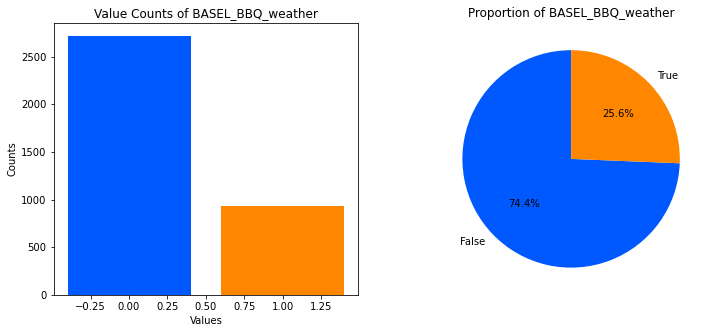

In [237]:
plt.figure(figsize=(12, 5))

# Plot the bar chart

plt.subplot(1, 2, 1)
bar_colors = ['#0059FF', '#FF8700'] 
plt.bar(df_bbq.value_counts().index, df_bbq.value_counts(), color=bar_colors)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of BASEL_BBQ_weather')

# Plot the pie chart

plt.subplot(1, 2, 2)
pie_colors = ['#0059FF', '#FF8700'] 
plt.pie(df_bbq.value_counts(), labels=df_bbq.value_counts().index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.title('Proportion of BASEL_BBQ_weather')

# Show the plot
plt.show()

In [238]:
# merging two datasets

merged_df = pd.concat([df, df_bbq], axis = 1)
merged_df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BASEL_BBQ_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8,False
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0,False
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5,False
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9,False


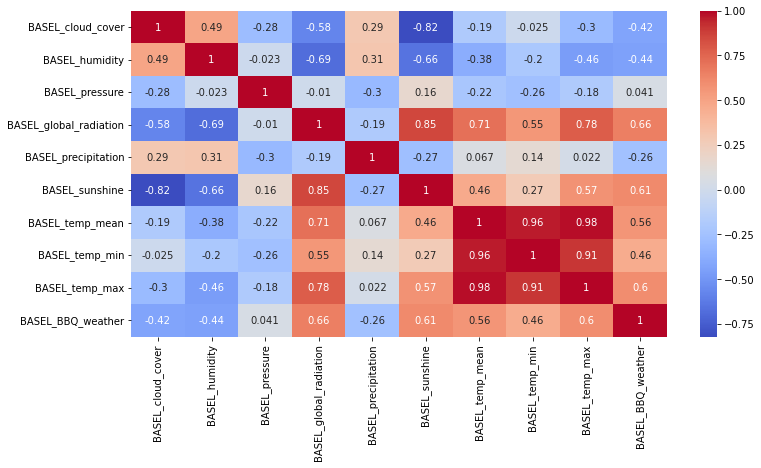

In [239]:
# the corr between columns

plt.figure(figsize=(12,6))
sns.heatmap(merged_df.drop(columns=['MONTH','DATE']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [240]:
# removing useless columns

merged_df = merged_df.drop(columns=['BASEL_pressure','DATE','BASEL_temp_min','BASEL_temp_max'])

In [241]:
# make 'MONTH' column encoded so we will use it

encoded_df = pd.get_dummies(merged_df, columns=['MONTH'], prefix='MONTH')
encoded_df = encoded_df.drop(columns=["BASEL_BBQ_weather"])
encoded_df

,BASEL_cloud_cover,BASEL_humidity,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,8,0.89,0.20,0.03,0.0,2.9,1,0,0,0,0,0,0,0,0,0,0,0
1,8,0.87,0.25,0.00,0.0,3.6,1,0,0,0,0,0,0,0,0,0,0,0
2,5,0.81,0.50,0.00,3.7,2.2,1,0,0,0,0,0,0,0,0,0,0,0
3,7,0.79,0.63,0.35,6.9,3.9,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0.90,0.51,0.07,3.7,6.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,7,0.82,0.28,0.42,0.3,3.2,0,0,0,0,0,0,0,0,0,0,0,1
3650,7,0.92,0.22,1.68,0.2,4.5,0,0,0,0,0,0,0,0,0,0,0,1
3651,8,0.92,0.07,1.54,0.0,8.5,0,0,0,0,0,0,0,0,0,0,0,1
3652,7,0.93,0.17,0.57,0.1,6.6,0,0,0,0,0,0,0,0,0,0,0,1


# ML


In [242]:
# Features

X = encoded_df
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,8,0.89,0.20,0.03,0.0,2.9,1,0,0,0,0,0,0,0,0,0,0,0
1,8,0.87,0.25,0.00,0.0,3.6,1,0,0,0,0,0,0,0,0,0,0,0
2,5,0.81,0.50,0.00,3.7,2.2,1,0,0,0,0,0,0,0,0,0,0,0
3,7,0.79,0.63,0.35,6.9,3.9,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0.90,0.51,0.07,3.7,6.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,7,0.82,0.28,0.42,0.3,3.2,0,0,0,0,0,0,0,0,0,0,0,1
3650,7,0.92,0.22,1.68,0.2,4.5,0,0,0,0,0,0,0,0,0,0,0,1
3651,8,0.92,0.07,1.54,0.0,8.5,0,0,0,0,0,0,0,0,0,0,0,1
3652,7,0.93,0.17,0.57,0.1,6.6,0,0,0,0,0,0,0,0,0,0,0,1


In [243]:
X[68:69]

,BASEL_cloud_cover,BASEL_humidity,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
68,7,0.53,1.15,0.0,3.9,14.1,0,0,1,0,0,0,0,0,0,0,0,0


In [244]:
# Target

y = merged_df['BASEL_BBQ_weather'].astype(int)
y

0       0
1       0
2       0
3       0
4       0
       ..
3649    0
3650    0
3651    0
3652    0
3653    0
Name: BASEL_BBQ_weather, Length: 3654, dtype: int32

In [245]:
y[y==1]

68      1
81      1
93      1
104     1
110     1
       ..
3559    1
3560    1
3561    1
3563    1
3565    1
Name: BASEL_BBQ_weather, Length: 937, dtype: int32

## Scaling the features 

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df

,BASEL_cloud_cover,BASEL_humidity,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,1.110260,1.344433,-1.208678,-0.382044,-1.076608,-1.095641,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
1,1.110260,1.158857,-1.155215,-0.437993,-1.076608,-1.001222,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
2,-0.179963,0.602130,-0.887898,-0.437993,-0.222009,-1.190060,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
3,0.680186,0.416555,-0.748894,0.214755,0.517103,-0.960756,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
4,-0.179963,1.437221,-0.877206,-0.307444,-0.222009,-0.677498,3.278597,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.680186,0.694918,-1.123137,0.345305,-1.007316,-1.055176,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3650,0.680186,1.622796,-1.187293,2.695200,-1.030413,-0.879826,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3651,1.110260,1.622796,-1.347683,2.434101,-1.076608,-0.340287,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372
3652,0.680186,1.715584,-1.240756,0.625054,-1.053510,-0.596568,-0.305009,-0.289744,-0.304472,-0.299074,-0.304472,-0.299074,-0.304472,-0.304472,-0.299074,-0.304472,-0.299074,3.284372


In [247]:
# split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# SVM Classification model (SVC)

In [248]:
# train and test SVM model

from sklearn.svm import SVC

svc = SVC(C=100)
svc.fit(X_train, y_train)
svc_train = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
svc_y_train_pred = svc.predict(X_train)
svc_y_pred = svc.predict(X_test)

In [249]:
print('training score : ',svc_train)
print('testing score : ',svc_test)

training score :  0.9722887444406432
testing score :  0.9521203830369357


## Evaluate SVC model

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred,labels=[0,1])
svc_recall_score = recall_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_f1 = f1_score(y_test, svc_y_pred)

In [251]:
print('recall_score : ',svc_recall_score)
print('precision : ',svc_precision)
print('f1 : ',svc_f1)

recall_score :  0.9629629629629629
precision :  0.8666666666666667
f1 :  0.912280701754386


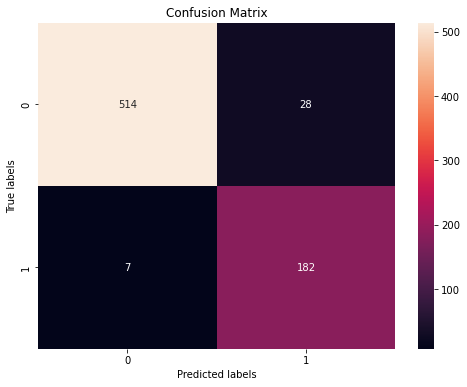

In [252]:
plt.figure(figsize=(8, 6))
sns.heatmap(svc_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predict function for SVC model

In [253]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def predict_svc_from_user_input(svc, encoded_df):
    # Get input from the user for each feature
    BASEL_cloud_cover = float(input("Enter the value for BASEL_cloud_cover: "))
    BASEL_humidity = float(input("Enter the value for BASEL_humidity: "))
    BASEL_global_radiation = float(input("Enter the value for BASEL_global_radiation: "))
    BASEL_precipitation = float(input("Enter the value for BASEL_precipitation: "))
    BASEL_sunshine = float(input("Enter the value for BASEL_sunshine: "))
    BASEL_temp_mean = float(input("Enter the value for BASEL_temp_mean: "))
    MONTH = input("Enter the MONTH (e.g., 1, 2, 3..): ")

    # Create the input_data DataFrame
    input_data = pd.DataFrame({
        'BASEL_cloud_cover': [BASEL_cloud_cover],
        'BASEL_humidity': [BASEL_humidity],
        'BASEL_global_radiation': [BASEL_global_radiation],
        'BASEL_precipitation': [BASEL_precipitation],
        'BASEL_sunshine': [BASEL_sunshine],
        'BASEL_temp_mean': [BASEL_temp_mean]
    }, index=[0])

    # Add dummy columns for each MONTH
    MONTHs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for m in MONTHs:
        if m == MONTH:
            input_data['MONTH_' + m] = 1
        else:
            input_data['MONTH_' + m] = 0
    combined_df = pd.concat([encoded_df, input_data], axis=0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_df)
    combined_df = pd.DataFrame(scaled_data, columns=combined_df.columns)
    input_data = combined_df.tail(1)
    predicted_svc = svc.predict(input_data)
    return predicted_svc

# # Example usage:
# # Assuming you have svc and encoded_df already defined
if predict_svc_from_user_input(svc, encoded_df) == 1 :
    print("You can BBQ this day")
else :
    print("NO BBQ this day")

# print("Predicted mean temperature for SVC model is:", predicted_value)


Enter the value for BASEL_cloud_cover: 8
Enter the value for BASEL_humidity: 0.92
Enter the value for BASEL_global_radiation: 0.55
Enter the value for BASEL_precipitation: 0.53
Enter the value for BASEL_sunshine: 0.1
Enter the value for BASEL_temp_mean: 9
Enter the MONTH (e.g., 1, 2, 3..): 9
NO BBQ this day


# Decision Tree Classification model

In [254]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(min_samples_split=40)

tree_class.fit(X_train, y_train)

tree_class_train = tree_class.score(X_train, y_train)
tree_class_test = tree_class.score(X_test, y_test)
tree_class_y_pred = tree_class.predict(X_test)

In [255]:
print('training score : ', tree_class_train)
print('testing score : ', tree_class_test)

training score :  0.9866575436195689
testing score :  0.9781121751025992


## Evaluate DT model

In [256]:
tree_confusion_matrix = confusion_matrix(y_test, tree_class_y_pred,labels=[0,1])
tree_recall_score = recall_score(y_test, tree_class_y_pred)
tree_precision = precision_score(y_test, tree_class_y_pred)
tree_f1 = f1_score(y_test, tree_class_y_pred)

In [257]:
print('recall_score : ',tree_recall_score)
print('precision : ',tree_precision)
print('f1 : ',tree_f1)

recall_score :  0.9735449735449735
precision :  0.9435897435897436
f1 :  0.9583333333333333


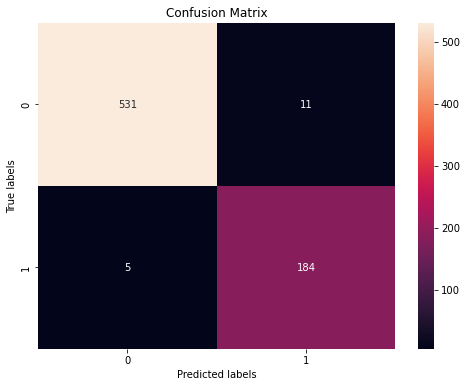

In [258]:
plt.figure(figsize=(8, 6))
sns.heatmap(tree_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## This is our tree

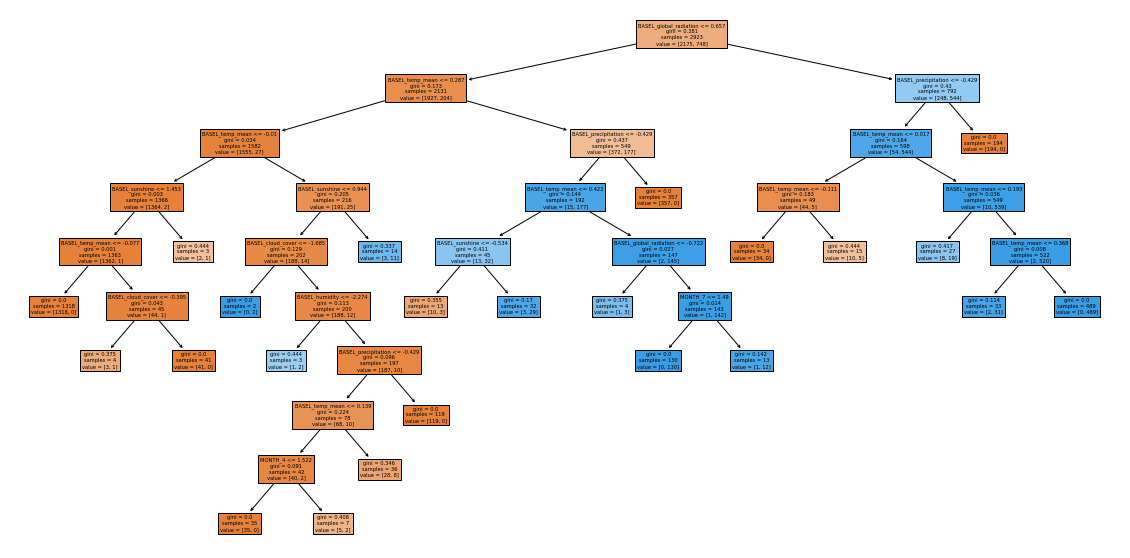

In [259]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10)) 
plot_tree(tree_class, filled=True, feature_names=X.columns)
plt.show()

## Predict function for Decision Tree model (Classification)

In [260]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def predict_tree_class_from_user_input(tree_class, encoded_df):
    # Get input from the user for each feature
    BASEL_cloud_cover = float(input("Enter the value for BASEL_cloud_cover: "))
    BASEL_humidity = float(input("Enter the value for BASEL_humidity: "))
    BASEL_global_radiation = float(input("Enter the value for BASEL_global_radiation: "))
    BASEL_precipitation = float(input("Enter the value for BASEL_precipitation: "))
    BASEL_sunshine = float(input("Enter the value for BASEL_sunshine: "))
    BASEL_temp_mean = float(input("Enter the value for BASEL_temp_mean: "))
    MONTH = input("Enter the MONTH (e.g., 1, 2, 3..): ")

    # Create the input_data DataFrame
    input_data = pd.DataFrame({
        'BASEL_cloud_cover': [BASEL_cloud_cover],
        'BASEL_humidity': [BASEL_humidity],
        'BASEL_global_radiation': [BASEL_global_radiation],
        'BASEL_precipitation': [BASEL_precipitation],
        'BASEL_sunshine': [BASEL_sunshine],
        'BASEL_temp_mean': [BASEL_temp_mean]
    }, index=[0])

    # Add dummy columns for each MONTH
    MONTHs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for m in MONTHs:
        if m == MONTH:
            input_data['MONTH_' + m] = 1
        else:
            input_data['MONTH_' + m] = 0
            
    combined_df = pd.concat([encoded_df, input_data], axis=0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_df)
    combined_df = pd.DataFrame(scaled_data, columns=combined_df.columns)
    input_data = combined_df.tail(1)
    
    predicted_tree_class = tree_class.predict(input_data)
    return predicted_tree_class

# Example usage:
# Assuming you have tree_class and encoded_df already defined
prediction = predict_tree_class_from_user_input(tree_class, encoded_df)
if prediction[0] == 1:
    print("You can BBQ this day")
else:
    print("NO BBQ this day")


Enter the value for BASEL_cloud_cover: 7
Enter the value for BASEL_humidity: 0.53
Enter the value for BASEL_global_radiation: 1.15
Enter the value for BASEL_precipitation: 0
Enter the value for BASEL_sunshine: 3.9
Enter the value for BASEL_temp_mean: 14.1
Enter the MONTH (e.g., 1, 2, 3..): 3
You can BBQ this day
